# Portfolio - 2

### Data driven prediction models of energy use of appliances in alow-energy house

***Student ID → 46277404***

***Student name → Mohammed Rizwan Amanullah***

***Github repository link →*** [https://github.com/MQCOMP6200/portfolio-s1-2021-mohrizwan1993](https://github.com/MQCOMP6200/portfolio-s1-2021-mohrizwan1993)

## Introduction

The aim of this portfolio is to reproduce some work on predicting energy usage of a house appliances based on IoT measurement of temperature, humidity and weather observations.

The data has been split into train and test data. As the dataset contains several features and the airport weather station is not at the same location as the house, we have to figure out the important parameter that helps to improve the prediction of appliances energy. RFE and RFECV algorithm is used to find the optimal number of features in train and test datset.

## Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import time
import math
import sklearn
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
warnings.simplefilter('ignore')

In [2]:
# loading the test and train dataset
train = pd.read_csv("data/portfolio_2/training.csv", index_col='date', parse_dates=True)
test = pd.read_csv("data/portfolio_2/testing.csv", index_col='date', parse_dates=True)

In [3]:
# shape of the train dataset
train.shape

(14803, 31)

In [4]:
# first five rows in the dataset
train.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [5]:
#dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14803 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   14803 non-null  int64  
 1   lights       14803 non-null  int64  
 2   T1           14803 non-null  float64
 3   RH_1         14803 non-null  float64
 4   T2           14803 non-null  float64
 5   RH_2         14803 non-null  float64
 6   T3           14803 non-null  float64
 7   RH_3         14803 non-null  float64
 8   T4           14803 non-null  float64
 9   RH_4         14803 non-null  float64
 10  T5           14803 non-null  float64
 11  RH_5         14803 non-null  float64
 12  T6           14803 non-null  float64
 13  RH_6         14803 non-null  float64
 14  T7           14803 non-null  float64
 15  RH_7         14803 non-null  float64
 16  T8           14803 non-null  float64
 17  RH_8         14803 non-null  float64
 18  T9         

## Appliances energy consumption measurement for the whole period

In [6]:
import matplotlib.dates as mdates
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

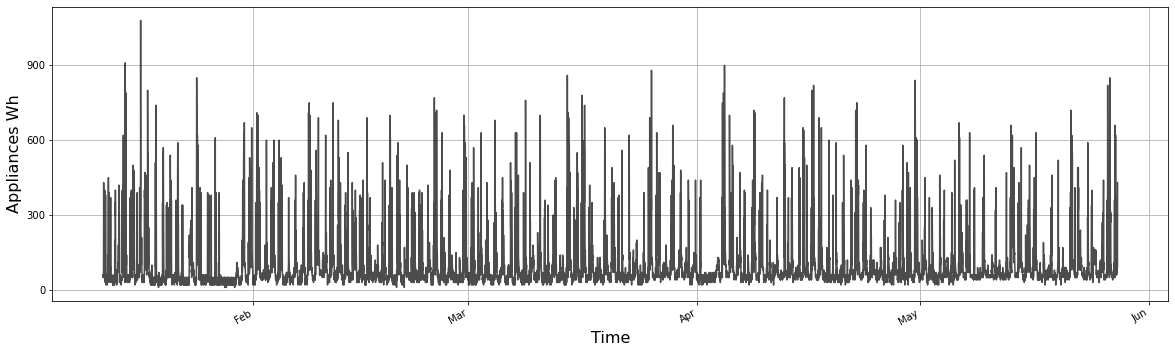

In [7]:
# plotting the appliances energy consumption measurement for the whole period
train['Appliances'].plot(figsize=(20,6), c='black', alpha=0.7, grid=True, markersize=0.5)
plt.ylabel("Appliances Wh", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.yticks(np.arange(0, 1200, 300))
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)

## Appliances energy consumption for one week (closer look)

In [8]:
# dataframe that has one week of data
train_week = train.loc['2016-01-11':'2016-01-19']

In [9]:
# Set the locator
locator = mdates.DayLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b %d')

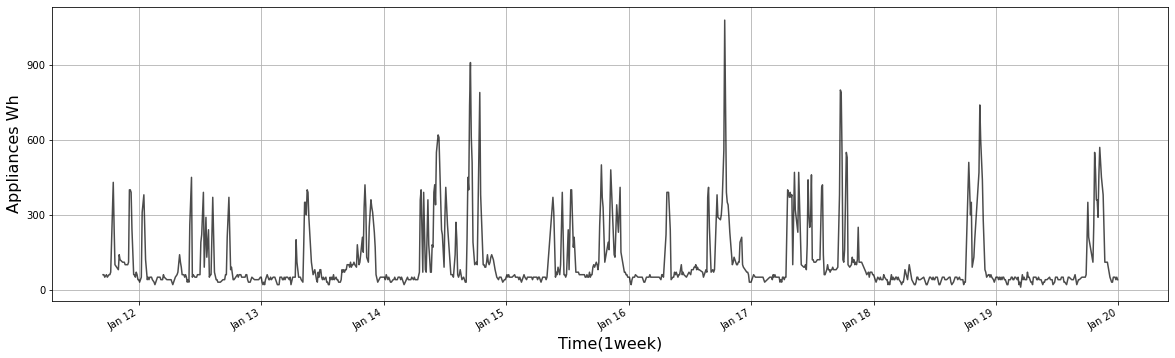

In [10]:
# plotting the appliances energy consumption for one week
train_week['Appliances'].plot(figsize=(20,6), c='black', alpha=0.7, grid=True, markersize=0.5)
plt.ylabel("Appliances Wh", fontsize=16)
plt.xlabel("Time(1week)", fontsize=16)
plt.yticks(np.arange(0, 1200, 300))
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)

## Distribution of appliances energy consumption

### Histogram

([<matplotlib.axis.YTick at 0x7feeb2de2710>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

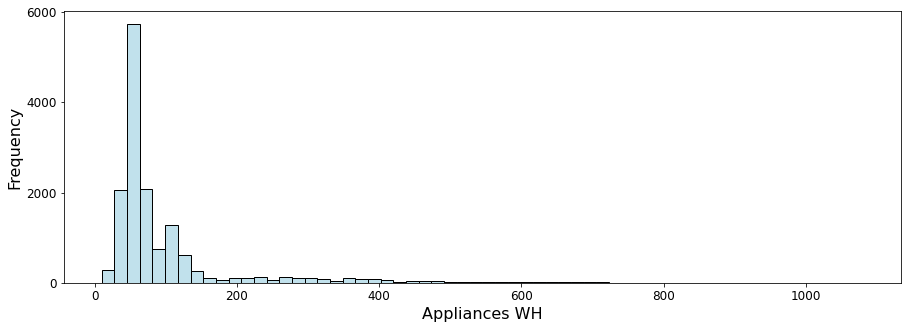

In [11]:
# histogram to show frequency of energy consumption in the interval bandwidth
plt.figure(figsize=(15,5))
frame = sns.histplot(data=train, x='Appliances', bins=60, color='lightblue').set_facecolor('xkcd:white')
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Appliances WH', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(np.arange(0, 8000, 2000), fontsize=12)



### Boxplot

(array([0]), [Text(0, 0, '')])

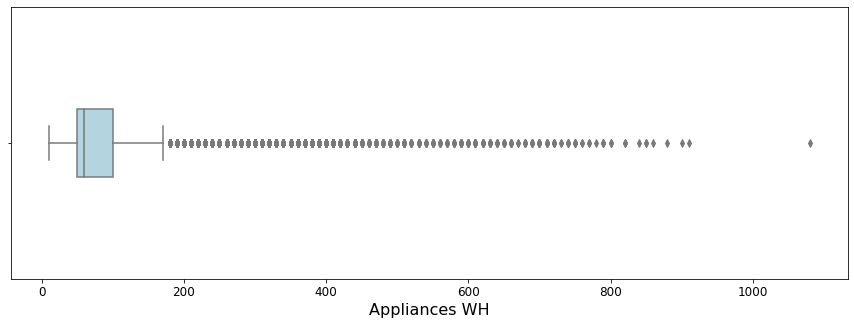

In [12]:
# boxplot to show the location of median, outliers, upper whisker and lower whisker
plt.figure(figsize=(15,5))
sns.boxplot(data=train, x='Appliances', width=0.25, color='lightblue').set_facecolor('xkcd:white')
plt.xlabel('Appliances WH', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


## Relationship between energy consumption of the appliances 

Pairgrid plot to show relationship between appliances energy and temperature between kitchen area, living room area and laundary area

In [13]:
# function to get the correlation coefficient values and annotate
def corrdot(x, y, **kwargs):
    corr_r = np.corrcoef(x, y)[0][1]
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", size=50,
                ha='center', va='center')

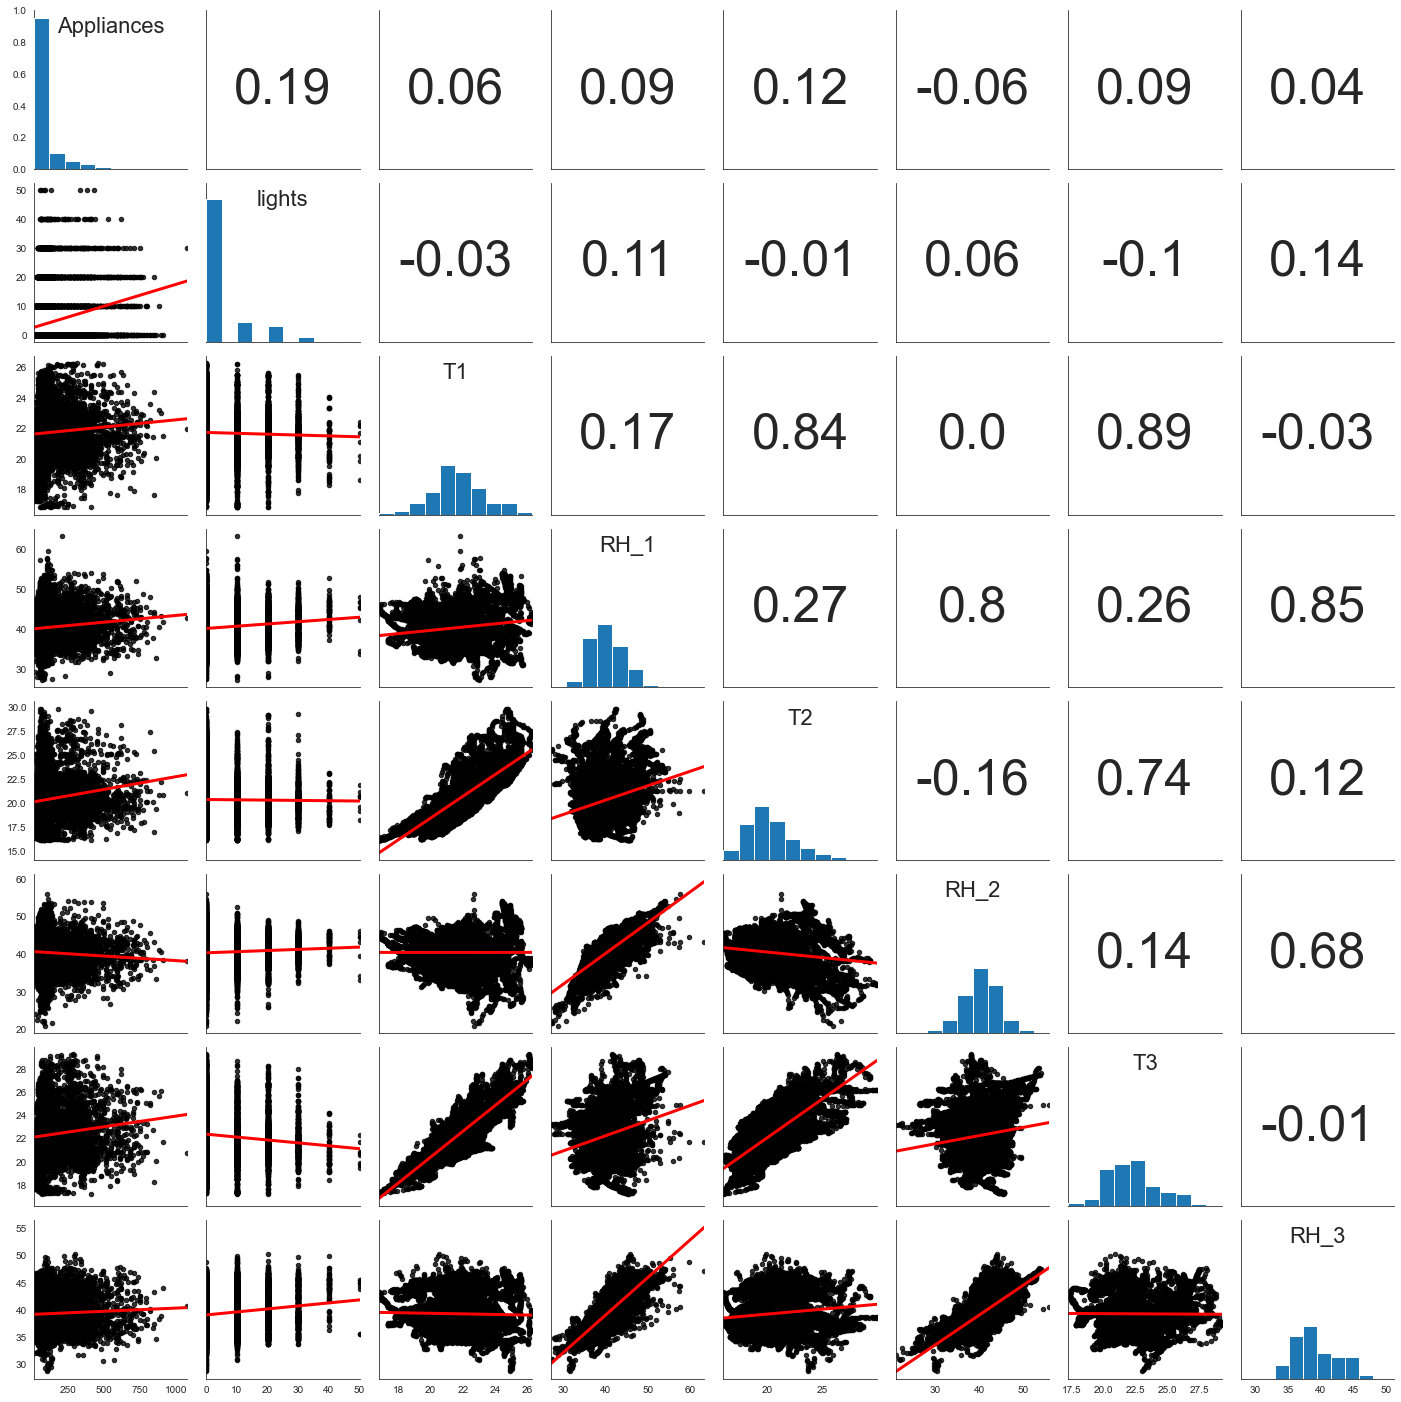

In [14]:
# pairgrid plot to show correlation between appliances and temperature between kitchen area, living room area and laundary area
sns.set_style("white")
grid = sns.PairGrid(train, vars=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2','T3', 'RH_3'])
grid.map_lower(sns.regplot, ci=False,
            line_kws={'color': 'red', 'lw': 3},
            scatter_kws={'color': 'black', 's': 20})
grid.map_diag(plt.hist)
grid.map_upper(corrdot)

for ax in grid.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
    
column_values = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']
    
for ax, col in zip(np.diag(grid.axes), column_values):
    ax.set_title(col, y=0.82, fontsize=22)



### Relationship between Appliances energy, temperature in office room, bathroom and outside the building

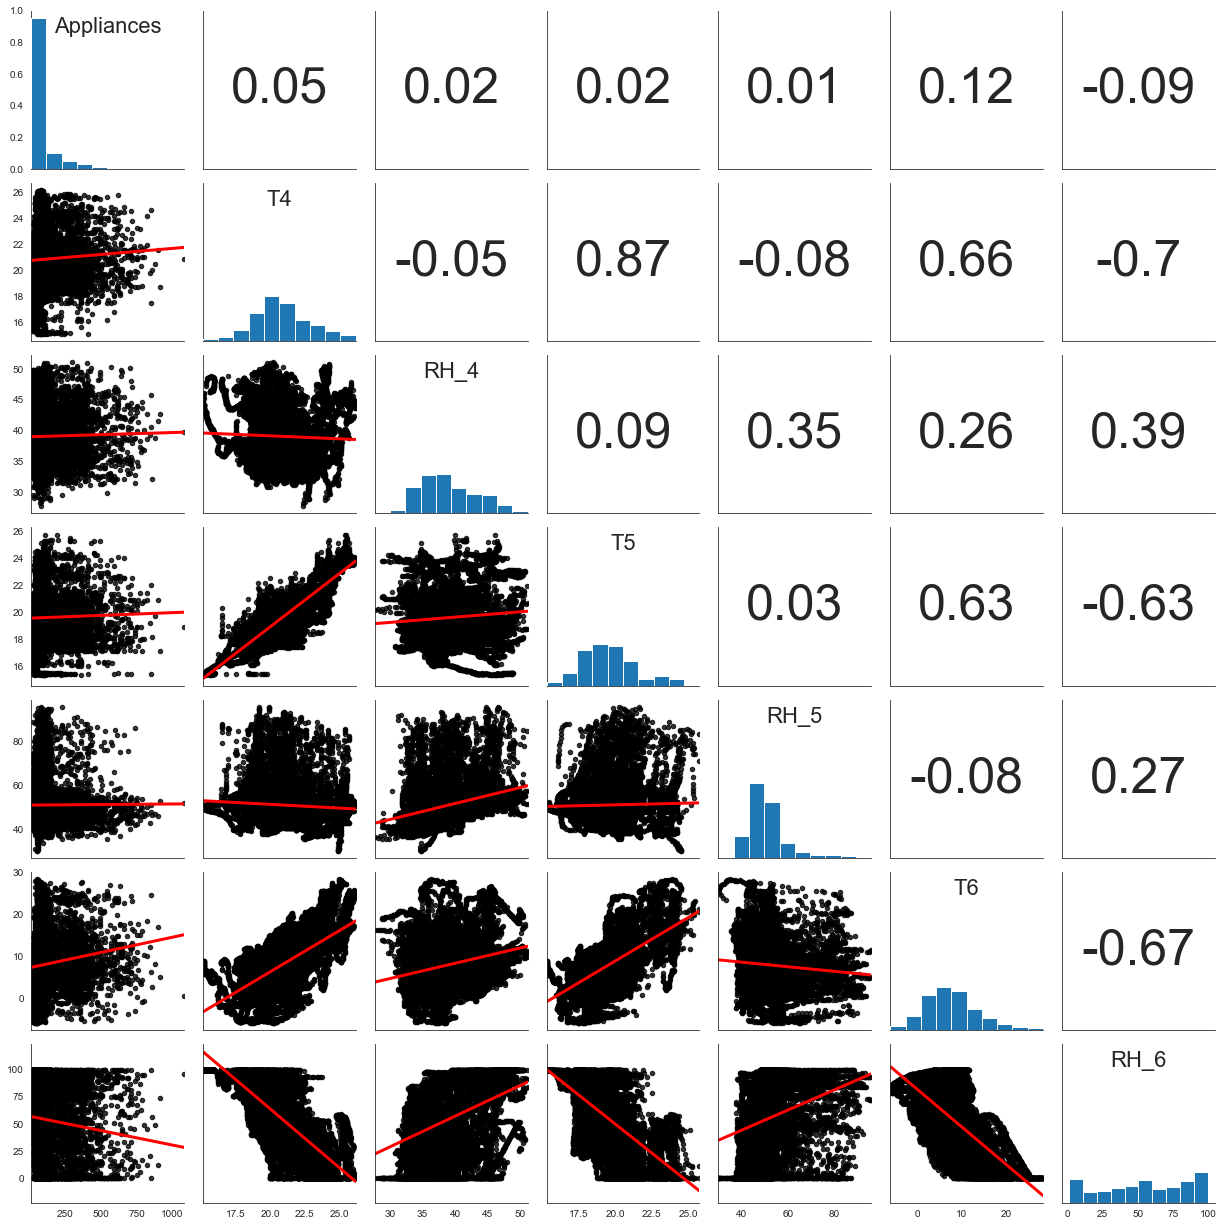

In [15]:
sns.set_style("white")
grid = sns.PairGrid(train, vars=['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6'])
grid.map_lower(sns.regplot, ci=False,
            line_kws={'color': 'red', 'lw': 3},
            scatter_kws={'color': 'black', 's': 20})
grid.map_diag(plt.hist)
grid.map_upper(corrdot)

for ax in grid.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
    
column_values = ['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6']
    
for ax, col in zip(np.diag(grid.axes), column_values):
    ax.set_title(col, y=0.82, fontsize=22)

### Relationship between Appliances energy, temperature in ironing room, teenage room, and parents room.

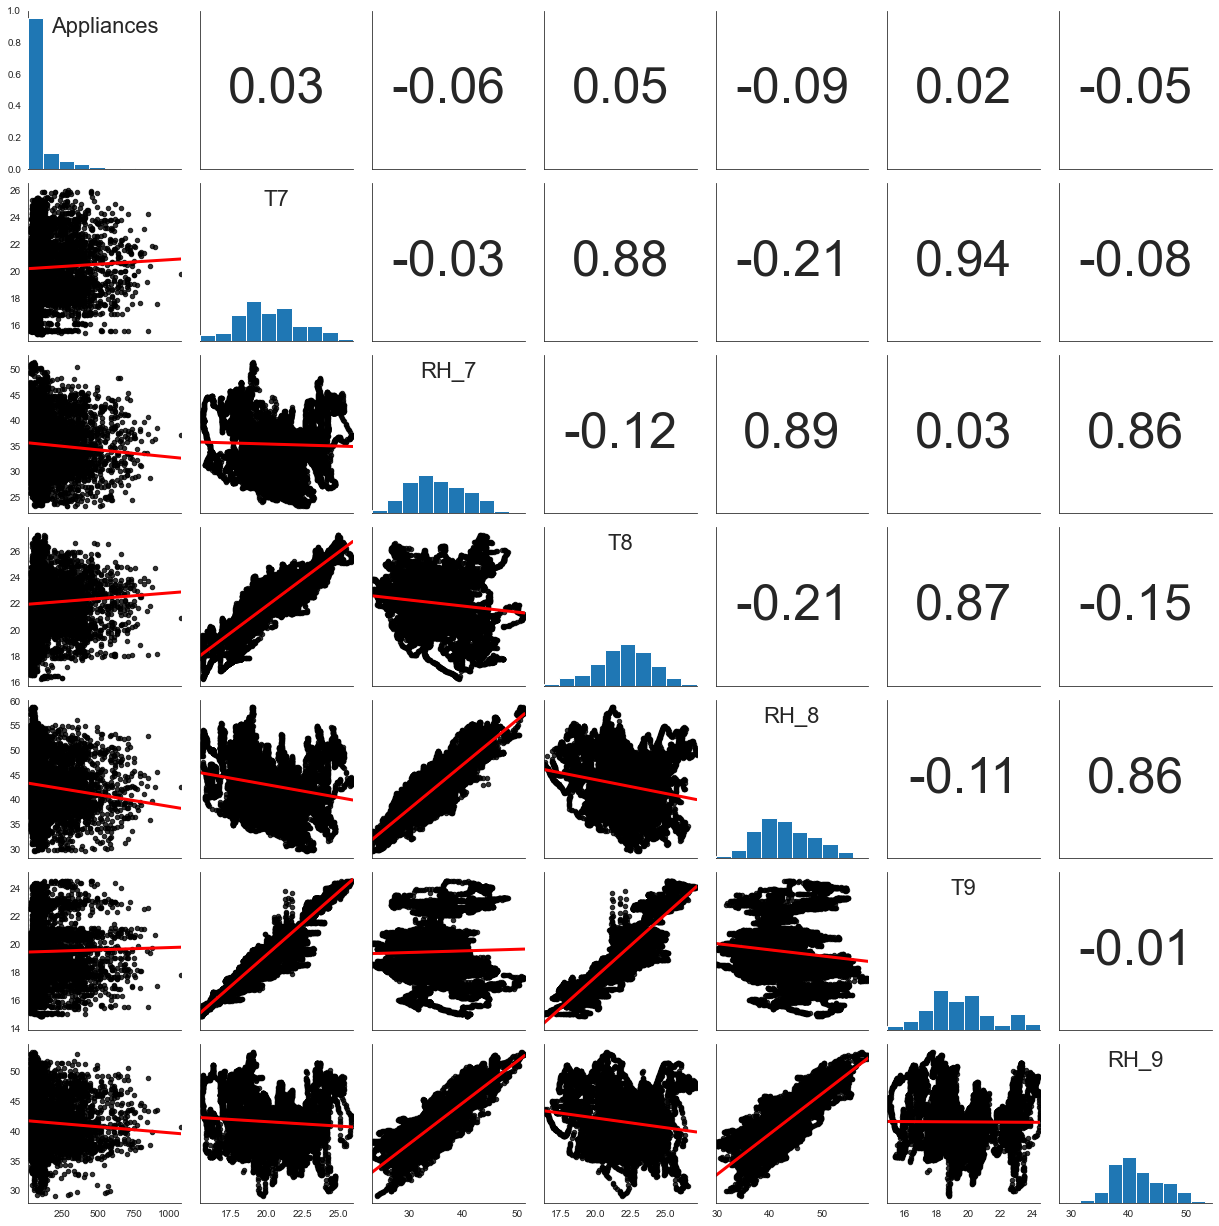

In [16]:
sns.set_style("white")
grid = sns.PairGrid(train, vars=['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9'])
grid.map_lower(sns.regplot, ci=False,
            line_kws={'color': 'red', 'lw': 3},
            scatter_kws={'color': 'black', 's': 20})
grid.map_diag(plt.hist)
grid.map_upper(corrdot)

for ax in grid.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
    
column_values = ['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']
    
for ax, col in zip(np.diag(grid.axes), column_values):
    ax.set_title(col, y=0.82, fontsize=22)

# Hourly energy consumption of appliances heat map for four consecutive weeks

In [17]:
# new dataframe for heat map
train_hm = train

In [18]:
train_hm["hours"] = train_hm.index.hour
cats = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cat_type = CategoricalDtype(categories=cats, ordered=True)

In [19]:
# creating dataframe for 4 specific weeks
train_hm_w1 = train_hm['2016-01-17':'2016-01-23']
train_hm_w2 = train_hm['2016-01-24':'2016-01-30']
train_hm_w3 = train_hm['2016-01-31':'2016-02-06']
train_hm_w4 = train_hm['2016-02-07':'2016-02-13']

In [20]:
# Changing the Day_of_week type to have start day as sunday, monday, etc.
train_hm_w1['Day_of_week'] = train_hm_w1['Day_of_week'].astype(cat_type)
train_hm_w2['Day_of_week'] = train_hm_w2['Day_of_week'].astype(cat_type)
train_hm_w3['Day_of_week'] = train_hm_w3['Day_of_week'].astype(cat_type)
train_hm_w4['Day_of_week'] = train_hm_w4['Day_of_week'].astype(cat_type)


In [21]:
# creating piviot table with aggregate function
train_hm_piv_w1 = pd.pivot_table(train_hm_w1, 
                                 values="Appliances", 
                                 index=["hours"], 
                                 columns=["Day_of_week"],
                                 aggfunc='sum')

train_hm_piv_w2 = pd.pivot_table(train_hm_w2, 
                                 values="Appliances", 
                                 index=["hours"], 
                                 columns=["Day_of_week"],
                                 aggfunc='sum')

train_hm_piv_w3 = pd.pivot_table(train_hm_w3, 
                                 values="Appliances", 
                                 index=["hours"], 
                                 columns=["Day_of_week"],
                                 aggfunc='sum')

train_hm_piv_w4 = pd.pivot_table(train_hm_w4, 
                                 values="Appliances", 
                                 index=["hours"], 
                                 columns=["Day_of_week"],
                                 aggfunc='sum')

In [22]:
# sorting by hours in reverse order.
hours = train_hm_w1['hours'].unique().tolist()
hours = sorted(hours, reverse=True)

train_hm_piv_w1 = train_hm_piv_w1.loc[hours]
train_hm_piv_w2 = train_hm_piv_w2.loc[hours]
train_hm_piv_w3 = train_hm_piv_w3.loc[hours]
train_hm_piv_w4 = train_hm_piv_w4.loc[hours]

[Text(0.5, 1.0, 'Week - 4'),
 Text(0.5, 215.33937888198741, 'Day of week'),
 Text(1033.3913043478262, 0.5, 'hour of day')]

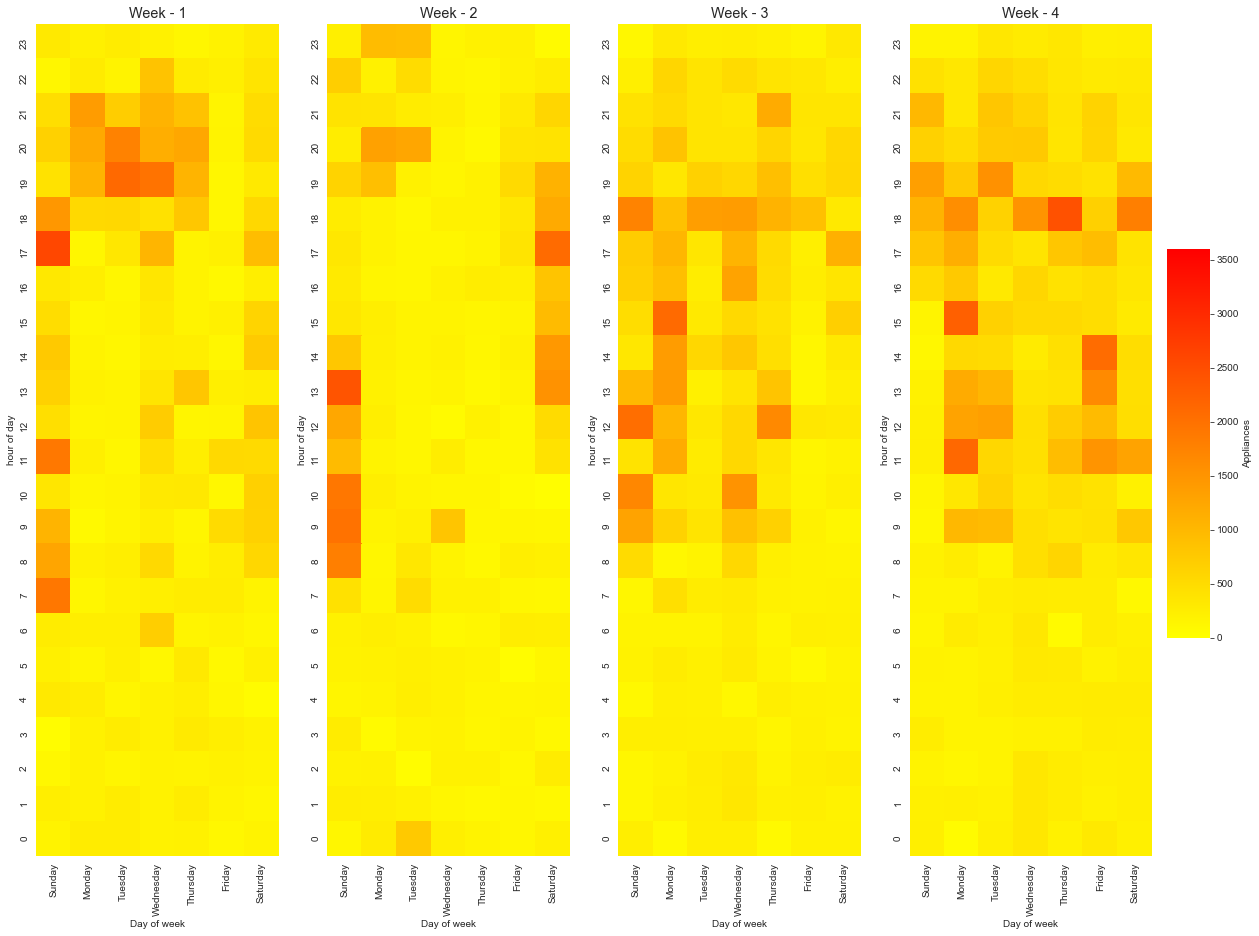

In [23]:
# plotting the heat map for four consecutive weeks
fig, axes = plt.subplots(1, 4, figsize=(20,18))
cb = fig.add_axes([0.91, 0.35, 0.03, 0.3])
sns.set(font_scale=1.2)
sns.heatmap(train_hm_piv_w1, square=True, robust=True, vmin=0, vmax=3600, 
            cbar_ax=cb, cbar_kws={'label' : 'Appliances'}, ax=axes[0], cmap='autumn_r')
sns.heatmap(train_hm_piv_w2, square=True, robust=True, vmin=0, vmax=3600, 
            cbar_ax=cb, cbar_kws={'label' : 'Appliances'}, ax=axes[1], cmap='autumn_r')
sns.heatmap(train_hm_piv_w3, square=True, robust=True, vmin=0, vmax=3600, 
            cbar_ax=cb, cbar_kws={'label' : 'Appliances'}, ax=axes[2], cmap='autumn_r')
sns.heatmap(train_hm_piv_w4, square=True, robust=True, vmin=0, vmax=3600, 
            cbar_ax=cb, cbar_kws={'label' : 'Appliances'}, ax=axes[3], cmap='autumn_r')

axes[0].set(title='Week - 1', xlabel='Day of week', ylabel='hour of day')
axes[1].set(title='Week - 2', xlabel='Day of week', ylabel='hour of day')
axes[2].set(title='Week - 3', xlabel='Day of week', ylabel='hour of day')
axes[3].set(title='Week - 4', xlabel='Day of week', ylabel='hour of day')


## Linear regression

In [24]:
# create X and y variable to perform linear regression
# get dummy variables for WeekStatus and Day_of_week
X = train.drop(columns=['Appliances', 'rv1', 'rv2'])
X = pd.get_dummies(X, columns = ['WeekStatus', 'Day_of_week'])
y = train[['Appliances']]

X['WeekStatus'] = X['WeekStatus'].map({'Weekday': 1, 'Weekend': 0})
X['Day_of_week'] = X['Day_of_week'].map({'Saturday': 1, 'Sunday': 2, 'Monday': 3, 
                                                     'Tuesday': 4, 'Wednesday': 5, 'Thursday': 6, 'Friday': 7})

In [25]:
# dataframe after converting to dummy variables.
X.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,hours,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17,1,0,0,1,0,0,0,0,0
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17,1,0,0,1,0,0,0,0,0
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17,1,0,0,1,0,0,0,0,0
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17,1,0,0,1,0,0,0,0,0
2016-01-11 17:50:00,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,...,17,1,0,0,1,0,0,0,0,0


In [26]:
#function to calculate RMSE, R2, MAE and MAPE
def metric_values(y, p):
    rmse = mean_squared_error(y, p, squared=False)
    print("RMSE: ", rmse)
    r2 = r2_score(y, p)
    print("R2: ", r2)
    mae = mean_absolute_error(y, p)
    print("MAE: ", mae)
    mape = mean_absolute_percentage_error(y, p)
    print("MAPE", mape*100)

### RFECV with estimator as linear regression on train dataset

In [27]:
# RFECV on train dataset
reg = linear_model.LinearRegression()
start_time = time.time()

rfecv = RFECV(estimator=reg, step=1, cv=StratifiedKFold(n_splits=5), 
              scoring='neg_root_mean_squared_error', min_features_to_select = 1)
rfecv.fit(X,y)
end_time = time.time()
rfecv_time = end_time - start_time
print(f"RFECV time is {rfecv_time}")

RFECV time is 2.185946226119995


In [28]:
ypred=rfecv.predict(X)
print('Optimal number of features: {}'.format(rfecv.n_features_))
print('---------------------------------')
metric_values(y, ypred)

Optimal number of features: 27
---------------------------------
RMSE:  93.29415528190636
R2:  0.17678121461704688
MAE:  53.21511423650063
MAPE 61.40501820221893


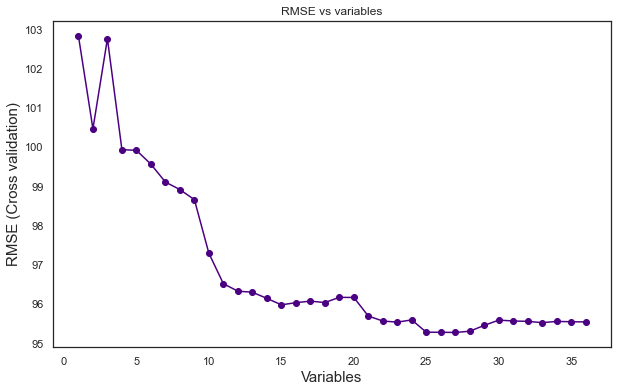

In [29]:
# Plotting RMSE vs variables
plt.figure(figsize=(10,6))
sns.set(style='white', font_scale=1)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), - rfecv.grid_scores_, color='indigo', marker='o')
plt.title("RMSE vs variables")
plt.xlabel("Variables", fontsize=15)
plt.ylabel("RMSE (Cross validation)", fontsize=15)
plt.show()

In [30]:
#calculating the residual error
residuals = y-ypred
residuals.shape

(14803, 1)

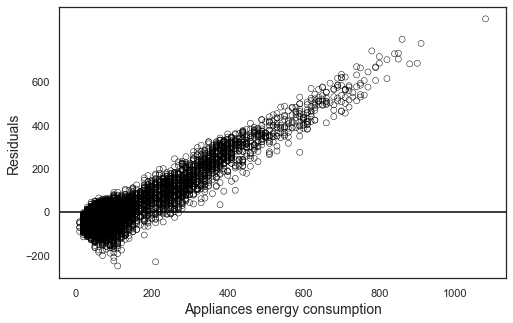

In [31]:
#scatterplot to show appliance energy consumption and residual error
plt.figure(figsize=(8,5))
sns.scatterplot(x=y['Appliances'], y=residuals['Appliances'],color="none", edgecolor="black")
plt.yticks(np.arange(-200, 800, 200))
plt.xlabel("Appliances energy consumption", fontsize=14,)
plt.ylabel("Residuals", fontsize=14)
plt.axhline(y = 0, color = 'black', linestyle = '-')

## using RFE to eliminate feature of less importance and measuring performance on test data

In [32]:
X_test = test.drop(columns=['Appliances', 'rv1', 'rv2'])
y_test = test[['Appliances']]

X_test['WeekStatus'] = X_test['WeekStatus'].map({'Weekday': 1, 'Weekend': 0})
X_test['Day_of_week'] = X_test['Day_of_week'].map({'Saturday': 1, 'Sunday': 2, 'Monday': 3, 
                                                     'Tuesday': 4, 'Wednesday': 5, 'Thursday': 6, 'Friday': 7})
    

In [33]:
cols = [x for x in X_test.columns.values]
col_size = X_test.shape[1]

for ix in range(1, col_size+1):
    selector = RFE(reg, ix)
    selector = selector.fit(X_test, y_test.values.ravel())
    
    lst = []
    for i in range(0, len(selector.support_)):
        if selector.support_[i] == True:
            lst.append(cols[i])
    
    drop_col = []
    for x in cols:
        if x not in lst:
            drop_col.append(x)
    
    RFE_X = X_test.drop(columns=drop_col)
    reg.fit(RFE_X, y_test)
    prd_trn = reg.predict(RFE_X)
    print('Number of best features: ', ix)
    print("Test Set: ")
    metric_values(y_test, prd_trn)
    print('')
    print('---------------------------------')

Number of best features:  1
Test Set: 
RMSE:  101.26043263790298
R2:  0.006747426448928118
MAE:  58.92967590383166
MAPE 74.18065161309765

---------------------------------
Number of best features:  2
Test Set: 
RMSE:  99.10484741736722
R2:  0.04858512696672712
MAE:  56.23718017125444
MAPE 68.99073166589804

---------------------------------
Number of best features:  3
Test Set: 
RMSE:  98.893461043322
R2:  0.05263945244975077
MAE:  56.21196073363291
MAPE 69.97889862367067

---------------------------------
Number of best features:  4
Test Set: 
RMSE:  97.86872172948459
R2:  0.0721709332785706
MAE:  56.02901916133972
MAPE 69.06857522826193

---------------------------------
Number of best features:  5
Test Set: 
RMSE:  97.59383332483065
R2:  0.07737568639778214
MAE:  55.84077707500468
MAPE 69.15637731456822

---------------------------------
Number of best features:  6
Test Set: 
RMSE:  97.17182982243722
R2:  0.08533743739799993
MAE:  55.10570670627111
MAPE 67.08419236967674

---------

# Conclusion

Overall,  in this portfolio I have reproduced work that was part of the research paper and performed Linear regression using REFCV and RFE on train and test data respectively. 

Comparing the values obtained in train and test data.

## Train data

### Research paper

- **RMSE - 93.21**
- $R^2 = 0.18$
- **MAE = 53.13**
- **MAPE = 61.32**

### Reproduced in portfolio - RFECV

- **RMSE - 93.29**
- $R^2 = 0.17$
- **MAE = 53.21**
- **MAPE = 61.40**

## Test data

### Research paper

- **RMSE - 93.18**
- $R^2 = 0.16$
- **MAE = 51.97**
- **MAPE = 59.93**

### Reproduced in portfolio - RFE

- **RMSE - 93.24**
- $R^2 = 0.15$
- **MAE = 51.59**
- **MAPE = 59.36**